In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
D = pd.read_csv("../data/feats/en_masc_crowdsourced.feats", sep="\t")

numeric_cols = [name for name in D.columns 
                if name.endswith("_n")
                if not name.startswith("i_")
                if name != 'b_stemcoverage_n']

bag_cols = [name for name in D.columns 
            if name.endswith("_b")
            if not name.startswith("i_")]

In [36]:
datasets = {}
for dataset_name in ('en_framenet', 'en_masc_crowdsourced', 'en_ritter_sst', 'eu_semcor', 'all_rounds'):
    dataset = pd.read_csv("../data/feats/{}.feats".format(dataset_name), sep="\t")
    dataset['dataset_name'] = dataset_name
    datasets[dataset_name] = dataset

D_all = pd.concat(datasets.values())

## Correlations

Numerical columns first

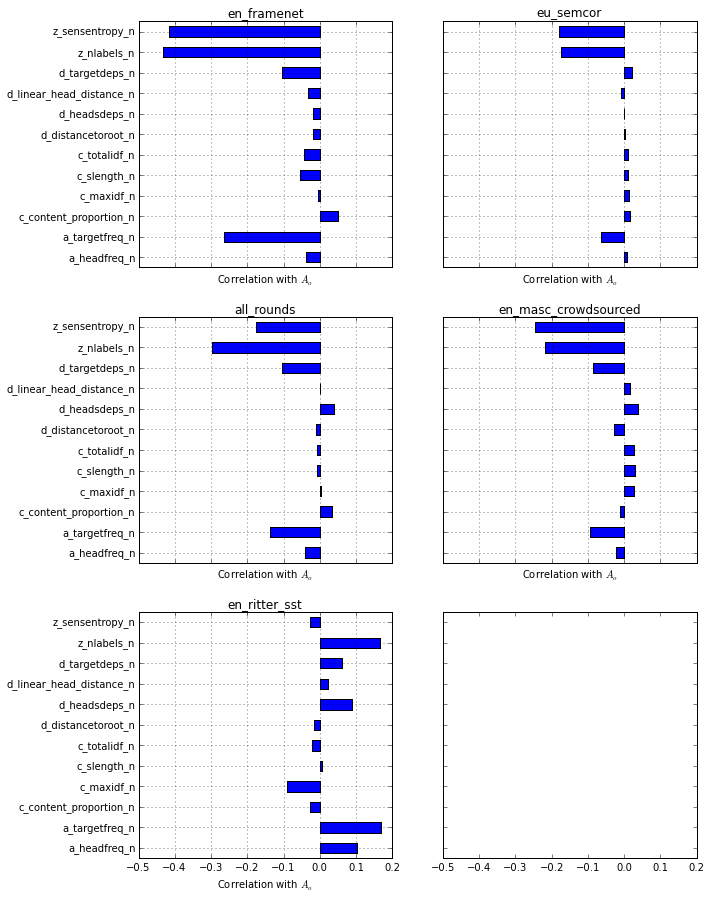

In [37]:
fig, axes = plt.subplots(3,2, figsize=(10, 15), sharex=True, sharey=True)
for i, (name, dataset) in enumerate(datasets.items()):
    ax = axes.flat[i]
    ax.set_title(name)
    ax.set_xlabel("Correlation with $A_o$")
    correlations = dataset[numeric_cols].corr('spearman').y_Ao_n
    correlations = correlations.drop('y_Ao_n')
    correlations.plot(kind='barh', ax=ax)

## Mean values of $A_o$ for categorial variables



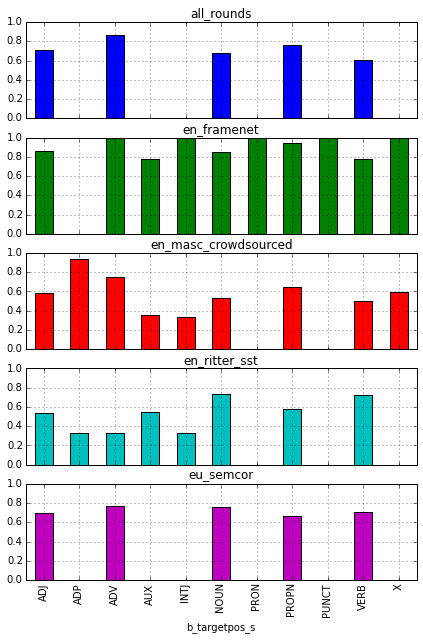

In [68]:
by_dataset = D_all.groupby(('dataset_name', 'b_targetpos_s')).y_Ao_n.mean().unstack(0)
by_dataset.plot(kind='bar', subplots=True, figsize=(7,10), sharey=True, legend=False);

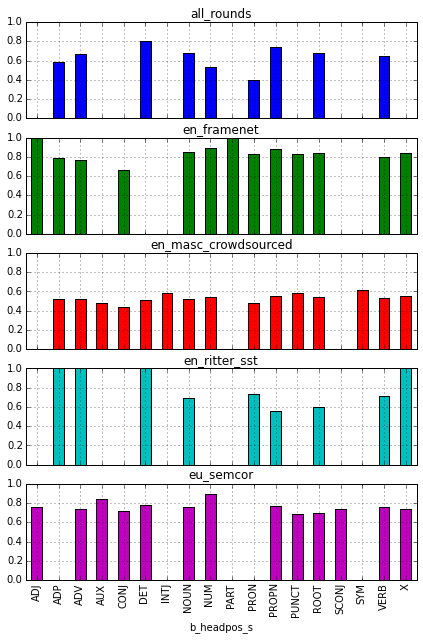

In [67]:
by_dataset = D_all.groupby(('dataset_name', 'b_headpos_s')).y_Ao_n.mean().unstack(0)
by_dataset.plot(kind='bar', subplots=True, figsize=(7,10), sharey=True, legend=False);

## Mean values with binned $A_o$ (classification scenario)

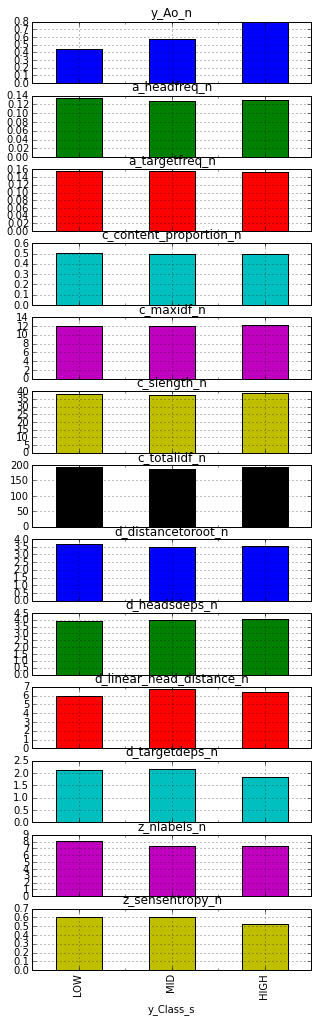

In [73]:
D_all[numeric_cols].groupby(D.y_Class_s).mean().T[['LOW', 'MID', 'HIGH']].T\
    .plot(kind='bar', subplots=True, figsize=(5, 17), legend=False);

### Averages across all datasets

In [74]:
D_all[numeric_cols].groupby(D.y_Class_s).mean().T[['LOW', 'MID', 'HIGH']]

y_Class_s,LOW,MID,HIGH
y_Ao_n,0.438713,0.572029,0.799370
a_headfreq_n,0.134450,0.127510,0.129388
a_targetfreq_n,0.157179,0.155088,0.153491
c_content_proportion_n,0.501169,0.492546,0.495726
c_maxidf_n,12.106282,12.099946,12.172229
c_slength_n,38.208818,37.836518,38.686390
c_totalidf_n,192.849473,187.274865,192.856544
d_distancetoroot_n,3.658345,3.470836,3.542392
d_headsdeps_n,3.934269,3.965554,4.056599
d_linear_head_distance_n,5.994503,6.751514,6.389213


### Averages for individidual datasets

(Beware of the huge table. Not intended to give an overview but is here in case you want to look up particular values).

In [78]:
D_all.groupby(('dataset_name', 'y_Class_s'))[numeric_cols].mean().T

dataset_name              all_rounds                         en_framenet  \
y_Class_s                       HIGH         LOW         MID        HIGH   
y_Ao_n                      0.955051    0.172801    0.476723    1.000000   
a_headfreq_n                0.095436    0.113857    0.109347    0.118463   
a_targetfreq_n              0.148984    0.148641    0.168572    0.155895   
c_content_proportion_n      0.463023    0.454058    0.456801    0.430277   
c_maxidf_n                 11.826918   11.904120   11.644691   11.780475   
c_slength_n                33.200852   34.770358   32.230912   21.824191   
c_totalidf_n              147.115615  155.831377  139.725879   95.240873   
d_distancetoroot_n          2.900639    3.078176    2.659218    2.713080   
d_headsdeps_n               4.252661    4.146580    3.886406    3.781997   
d_linear_head_distance_n    9.263307    9.249186    8.828678    5.330520   
d_targetdeps_n              1.808375    2.335505    2.731844    2.099859   
z_nlabels_n                 6.652945    7.659609   10.111732    3.209564   
z_sensentropy_n             0.470274    0.573022    0.685679    0.103701   

dataset_name                        en_masc_crowdsourced              \
y_Class_s                       LOW                 HIGH         LOW   
y_Ao_n                     0.303644             0.841469    0.253745   
a_headfreq_n               0.127465             0.113074    0.118401   
a_targetfreq_n             0.184411             0.157447    0.165459   
c_content_proportion_n     0.415778             0.464465    0.468516   
c_maxidf_n                11.789590            11.858033   11.678163   
c_slength_n               22.728745            35.255169   33.625445   
c_totalidf_n              99.373902           153.785934  146.655973   
d_distancetoroot_n         2.736842             3.108984    3.221490   
d_headsdeps_n              3.842105             4.305620    4.118852   
d_linear_head_distance_n   5.740891             8.028029    7.616714   
d_targetdeps_n             2.724696             2.175888    2.636671   
z_nlabels_n                4.919028             8.364517   10.094440   
z_sensentropy_n            0.339901             0.584350    0.686676   

dataset_name                         en_ritter_sst               eu_semcor  \
y_Class_s                        MID          HIGH         LOW        HIGH   
y_Ao_n                      0.477703      1.000000    0.299087    1.000000   
a_headfreq_n                0.112615      0.146320    0.133559    0.167538   
a_targetfreq_n              0.161176      0.170303    0.155027    0.141010   
c_content_proportion_n      0.463182      0.487427    0.484148    0.571050   
c_maxidf_n                 11.764648     11.306554   11.699442   12.972586   
c_slength_n                33.953178     23.472222   23.500000   48.460390   
c_totalidf_n              147.905129    101.586445  104.512298  291.585359   
d_distancetoroot_n          3.029155      3.211111    3.363014    4.613767   
d_headsdeps_n               4.146030      3.888889    3.486301    3.546340   
d_linear_head_distance_n    8.310288      3.911111    3.602740    2.732791   
d_targetdeps_n              2.597907      1.994444    1.780822    1.093962   
z_nlabels_n                 8.497626      1.733333    1.458904    4.644340   
z_sensentropy_n             0.677078      0.011097    0.019204    0.433915   

dataset_name                          
y_Class_s                        LOW  
y_Ao_n                      0.000000  
a_headfreq_n                0.166680  
a_targetfreq_n              0.144686  
c_content_proportion_n      0.567814  
c_maxidf_n                 12.891747  
c_slength_n                47.714257  
c_totalidf_n              286.442940  
d_distancetoroot_n          4.610588  
d_headsdeps_n               3.528975  
d_linear_head_distance_n    2.712051  
d_targetdeps_n              1.050932  
z_nlabels_n                 5.827351  
z_sensentropy_n             0.558372